In [1]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime, timedelta
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import datetime
import numpy.ma as ma
import glob
import os
from scipy.stats import pearsonr
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [2]:
folder_path = r"C:\Users\ollie\MSc Data Science\Group Project\finalNDVIdata"
file_list = sorted(glob.glob(os.path.join(folder_path, "*.nc")))
nc_files_dict = {}

# Gets all filenames and the month & year of the files to create a dictionary
for file in file_list:
    filename = os.path.basename(file)  
    parts = filename.split('_')
    if len(parts) >= 4:
        datetime_str = parts[3] 
        year = datetime_str[:4]
        month = datetime_str[4:6]
        key = f"{year}-{month}"
        nc_files_dict[key] = file
nc_files_dict

{'1999-01': 'C:\\Users\\ollie\\MSc Data Science\\Group Project\\finalNDVIdata\\c_gls_NDVI_199901210000_GLOBE_VGT_V3.0.1.nc',
 '1999-02': 'C:\\Users\\ollie\\MSc Data Science\\Group Project\\finalNDVIdata\\c_gls_NDVI_199902210000_GLOBE_VGT_V3.0.1.nc',
 '1999-03': 'C:\\Users\\ollie\\MSc Data Science\\Group Project\\finalNDVIdata\\c_gls_NDVI_199903210000_GLOBE_VGT_V3.0.1.nc',
 '1999-04': 'C:\\Users\\ollie\\MSc Data Science\\Group Project\\finalNDVIdata\\c_gls_NDVI_199904210000_GLOBE_VGT_V3.0.1.nc',
 '1999-05': 'C:\\Users\\ollie\\MSc Data Science\\Group Project\\finalNDVIdata\\c_gls_NDVI_199905210000_GLOBE_VGT_V3.0.1.nc',
 '1999-06': 'C:\\Users\\ollie\\MSc Data Science\\Group Project\\finalNDVIdata\\c_gls_NDVI_199906210000_GLOBE_VGT_V3.0.1.nc',
 '1999-07': 'C:\\Users\\ollie\\MSc Data Science\\Group Project\\finalNDVIdata\\c_gls_NDVI_199907210000_GLOBE_VGT_V3.0.1.nc',
 '1999-08': 'C:\\Users\\ollie\\MSc Data Science\\Group Project\\finalNDVIdata\\c_gls_NDVI_199908210000_GLOBE_VGT_V3.0.1.nc',


In [3]:
ndvi_monthly_mean = []
latmin, latmax = 28, 72
lonmin, lonmax = -12, 35

#Finds mean monthly NDVI and appends to an array
for i in nc_files_dict:
    nc_file = nc_files_dict.get(i)
    with xr.open_dataset(nc_file) as ds:
        ds = ds.drop_vars(["time", "NDVI_unc", "NOBS", "QFLAG", "TIME_GRID", "crs"])
        ds = ds.sel(time = 0)
        ds = ds.sel(lat=slice(latmax, latmin), lon=slice(lonmin, lonmax))
        ds_masked = ds.where(ds.NDVI <= 0.92)
        del ds
        ndvi_monthly_mean.append(ds_masked.NDVI.mean().values)
        del ds_masked




1999-01
1999-02
1999-03
1999-04
1999-05
1999-06
1999-07
1999-08
1999-09
1999-10
1999-11
1999-12
2000-01
2000-02
2000-03
2000-04
2000-05
2000-06
2000-07
2000-08
2000-09
2000-10
2000-11
2000-12
2001-01
2001-02
2001-03
2001-04
2001-05
2001-06
2001-07
2001-08
2001-09
2001-10
2001-11
2001-12
2002-01
2002-02
2002-03
2002-04
2002-05
2002-06
2002-07
2002-08
2002-09
2002-10
2002-11
2002-12
2003-01
2003-02
2003-03
2003-04
2003-05
2003-06
2003-07
2003-08
2003-09
2003-10
2003-11
2003-12
2004-01
2004-02
2004-03
2004-04
2004-05
2004-06
2004-07
2004-08
2004-09
2004-10
2004-11
2004-12
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
2006-01
2006-02
2006-03
2006-04
2006-05
2006-06
2006-07
2006-08
2006-09
2006-10
2006-11
2006-12
2007-01
2007-02
2007-03
2007-04
2007-05
2007-06
2007-07
2007-08
2007-09
2007-10
2007-11
2007-12
2008-01
2008-02
2008-03
2008-04
2008-05
2008-06
2008-07
2008-08
2008-09
2008-10
2008-11
2008-12
2009-01
2009-02
2009-03
2009-04
2009-05


[5.5, 17.5, 29.5, 41.5, 53.5, 65.5, 77.5, 89.5, 101.5, 113.5, 125.5, 137.5, 149.5, 161.5, 173.5, 185.5, 197.5, 209.5, 221.5, 233.5, 245.5, 254.5]
[5.5, 29.5, 53.5, 77.5, 101.5, 125.5, 149.5, 173.5, 197.5, 221.5, 245.5]


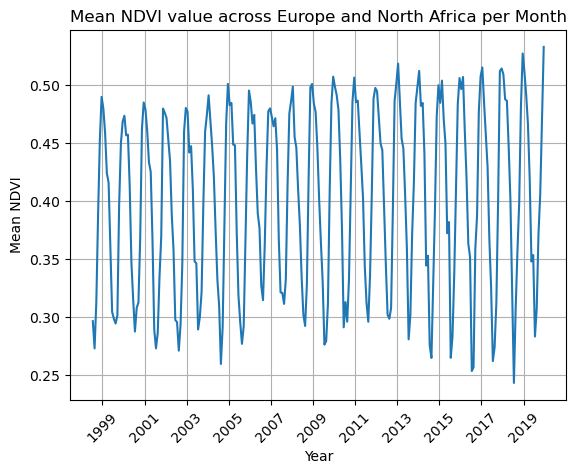

In [4]:
dates = pd.date_range(start="1999-01", end="2020-07", freq="M")
x_values = np.arange(len(dates))  # X-axis positions

# Extract unique years and find their midpoints
years = np.unique(dates.year)
years2 = [years[x] for x in range(len(years)) if x%2 == 0]
midpoints = [x_values[dates.year == year].mean() for year in years]
midpoints2 = [midpoints[x] for x in range(len(midpoints)) if x%2 == 0]
plt.plot(x_values, ndvi_monthly_mean)
plt.xticks(midpoints2, years2, rotation=45, ha="center")
plt.xlabel("Year")
plt.ylabel("Mean NDVI")

plt.title("Mean NDVI value across Europe and North Africa per Month")

plt.grid()

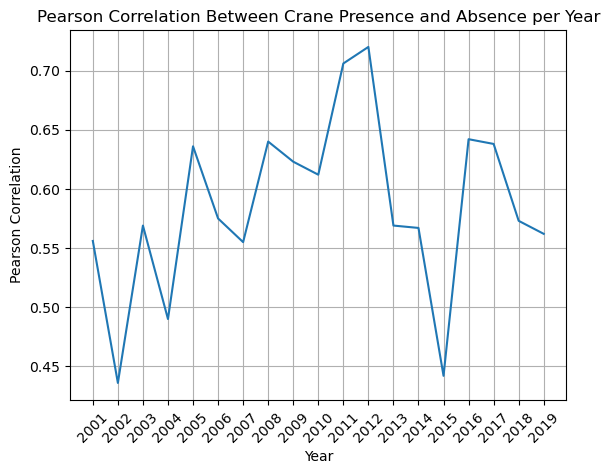

In [5]:
y = [0.556, 0.436, 0.569, 0.49, 0.636, 0.575, 0.555, 0.64, 0.623, 0.612, 0.706, 0.72, 0.569, 0.567, 0.442, 
    0.642, 0.638, 0.573, 0.562] # These values were pulled from the "NDVI_and_crane analysis file, pearson correlation values between crane presence and absence
x = [x for x in range(2001, 2020)]
x2 = [x[i] for i in range(len(x)) if i%2 == 0]
plt.plot(x, y)
plt.xticks(x, x, rotation = 45)
plt.xlabel("Year")
plt.ylabel("Pearson Correlation")
plt.title("Pearson Correlation Between Crane Presence and Absence per Year")
plt.grid()
plt.show()

In [12]:
crane_ndvi = pd.read_csv(r"C:\Users\ollie\MSc Data Science\Group Project\crane_temp_rain_tree_pop_veg_turbine_2001-2020.csv")
crane_absence_ndvi = pd.read_csv(r"C:\Users\ollie\MSc Data Science\Group Project\stork testing\crane_non_presence_ndvi.csv")

crane_ndvi["OBSERVATION DATE"] = pd.to_datetime(crane_ndvi["OBSERVATION DATE"], format="%Y-%m-%d", errors = "coerce")
crane_absence_ndvi["date"] = pd.to_datetime(crane_absence_ndvi["date"], format="%Y-%m-%d", errors = "coerce")

New Month Analysis: 2001


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


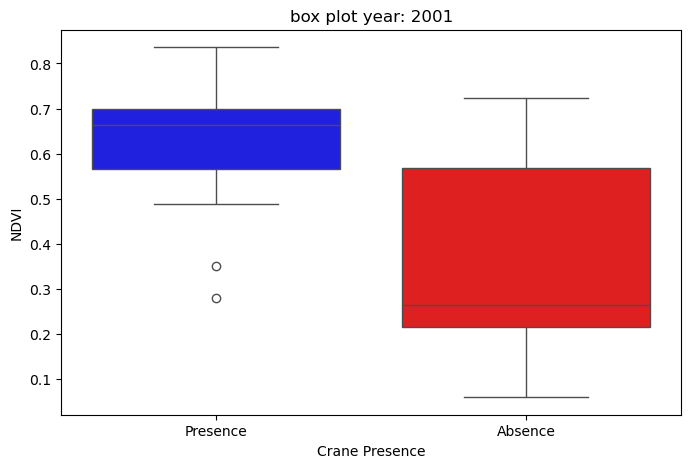

New Month Analysis: 2002


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


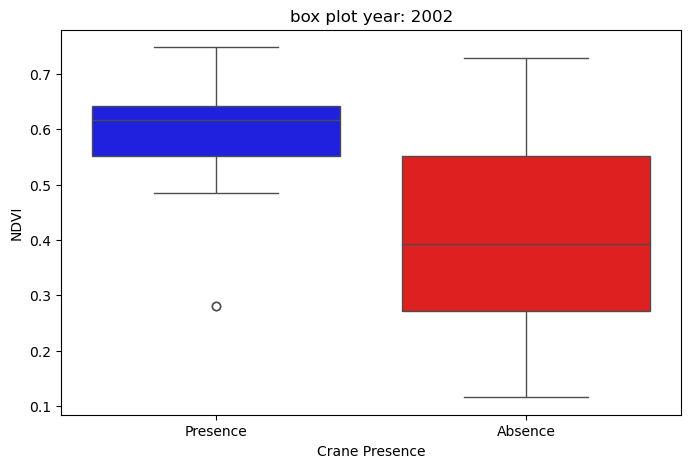

C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


New Month Analysis: 2003


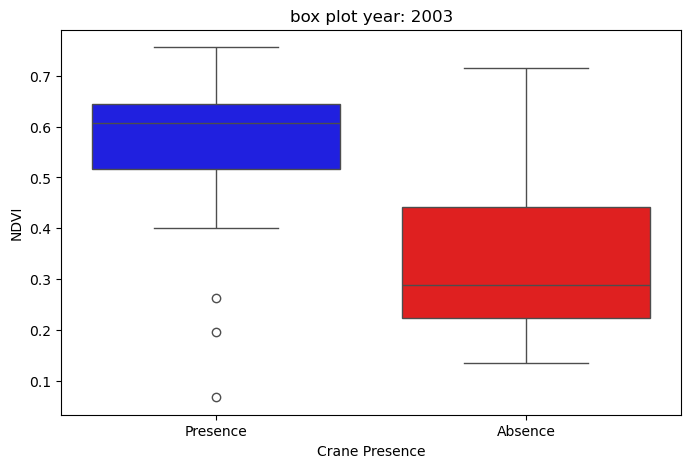

New Month Analysis: 2004


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


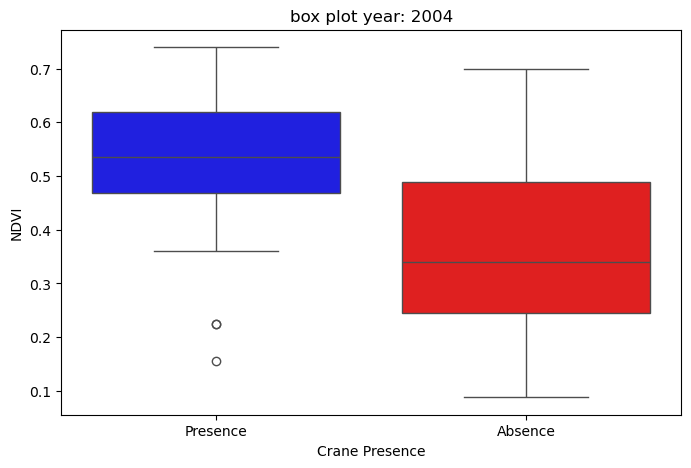

C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


New Month Analysis: 2005


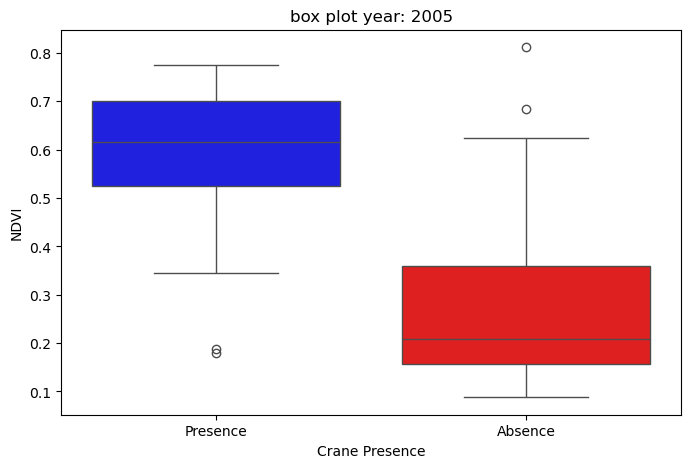

C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


New Month Analysis: 2006


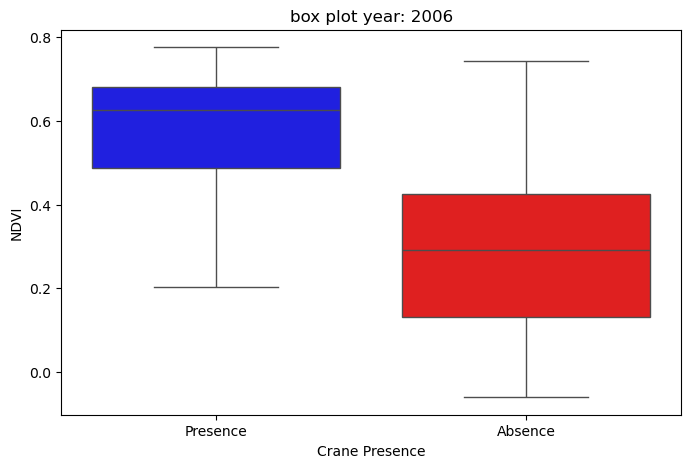

C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


New Month Analysis: 2007


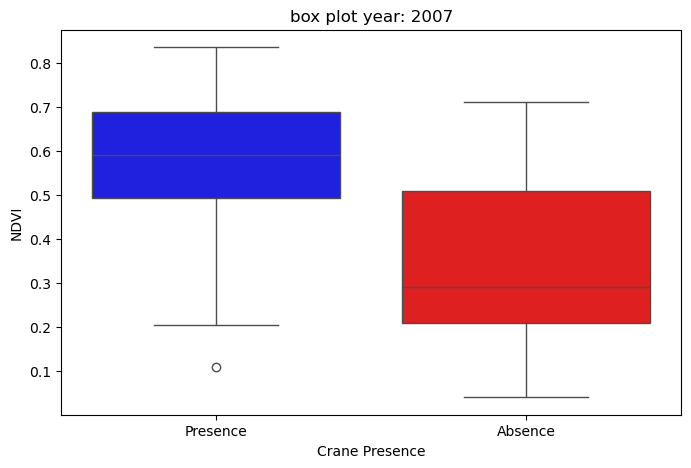

C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


New Month Analysis: 2008


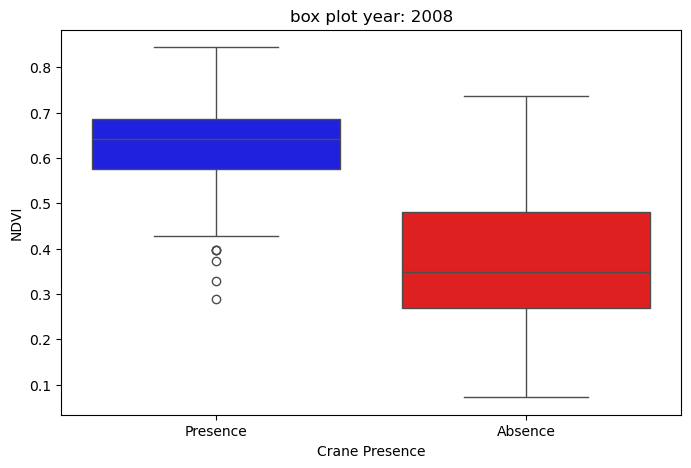

New Month Analysis: 2009


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


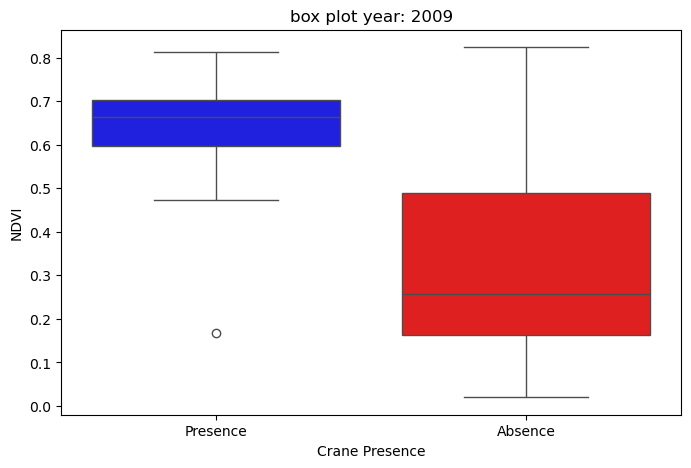

C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


New Month Analysis: 2010


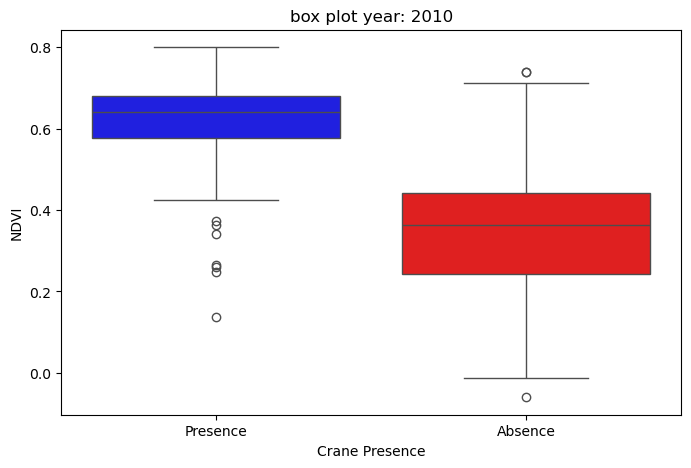

New Month Analysis: 2011


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


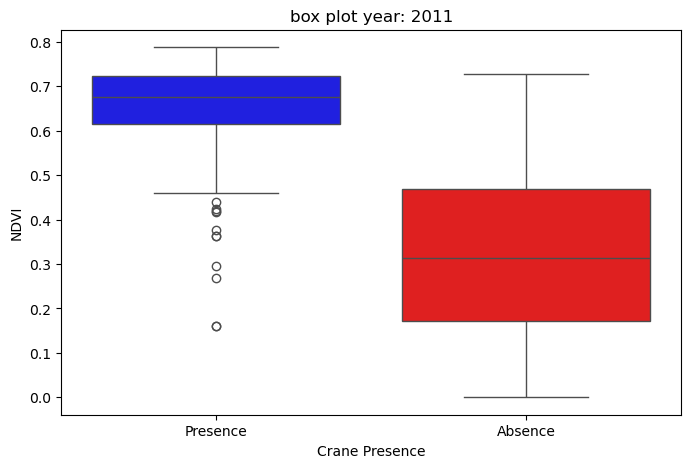

C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


New Month Analysis: 2012


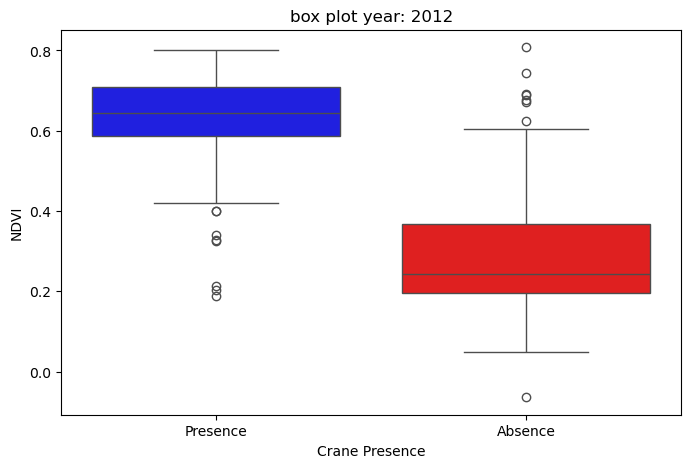

New Month Analysis: 2013


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


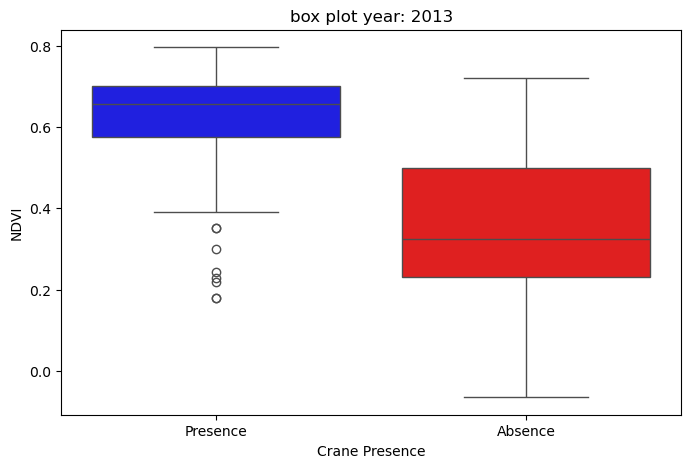

New Month Analysis: 2014


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


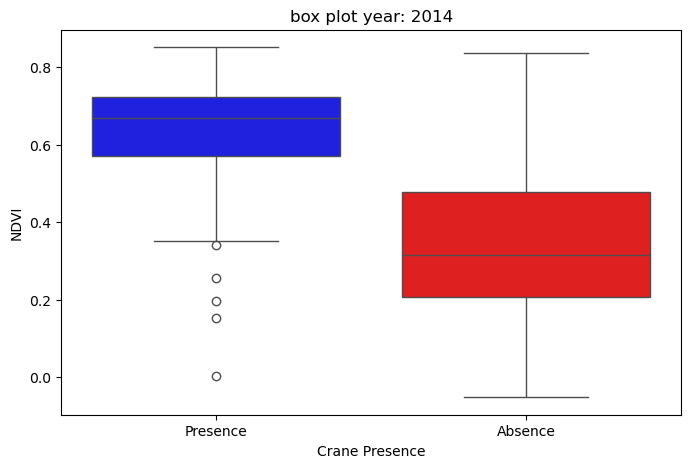

New Month Analysis: 2015


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


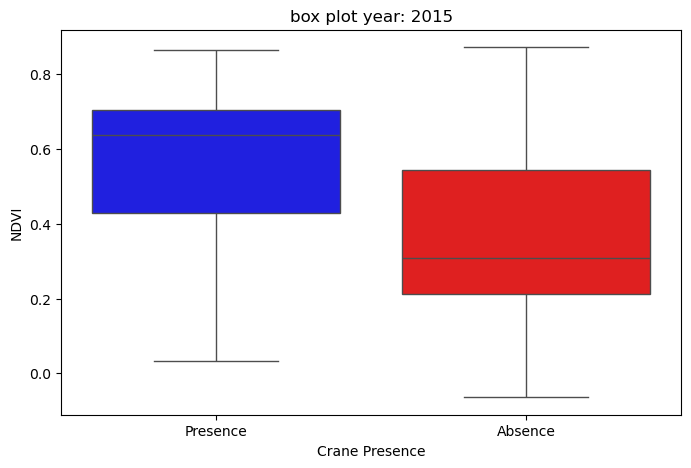

New Month Analysis: 2016


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


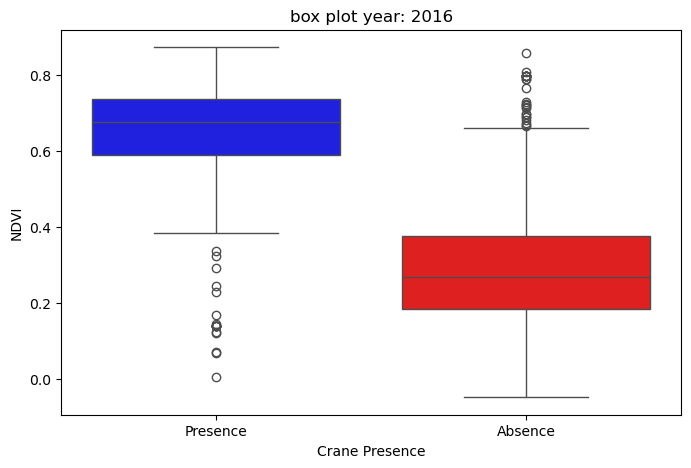

New Month Analysis: 2017


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


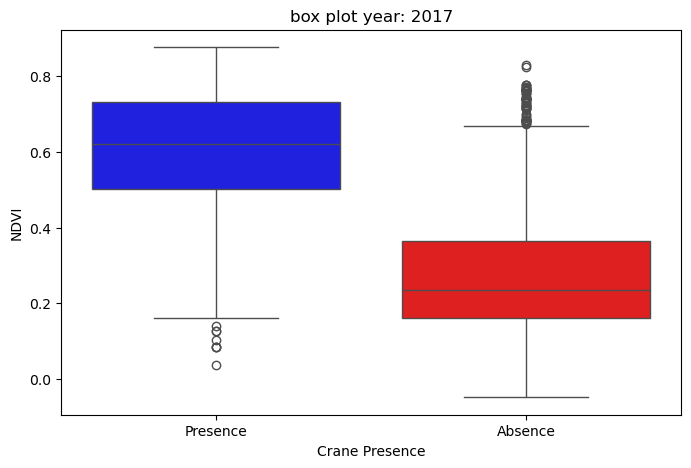

C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


New Month Analysis: 2018


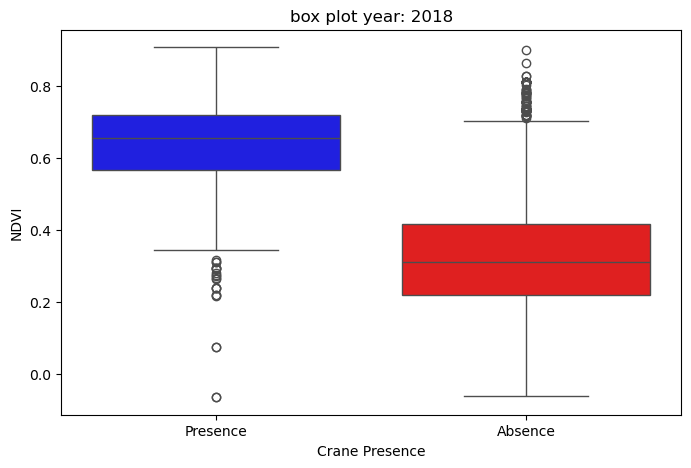

New Month Analysis: 2019


C:\Users\ollie\AppData\Local\Temp\ipykernel_13668\2510450374.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})


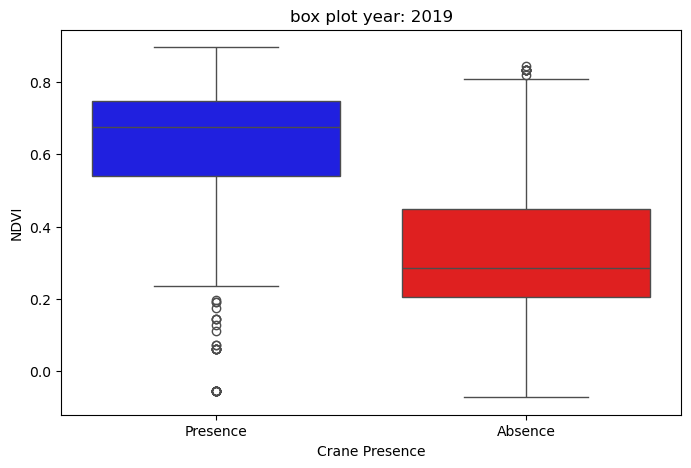

In [7]:
# Creates box plots of NDVI at presence and absence locations for every year to see the change in distribtion of the NDVI
for i in range(2001, 2020):
    print(f"New Month Analysis: {i}")
    presence_ndvi = crane_ndvi[(crane_ndvi["OBSERVATION DATE"].dt.year == i) & (crane_ndvi["OBSERVATION DATE"].dt.month == 6)]["NDVI"].values
    absence_ndvi = crane_absence_ndvi[(crane_absence_ndvi["date"].dt.year == i)  & (crane_absence_ndvi["date"].dt.month == 6)]["Crane non presence ndvi"].values
    
    combined_df = pd.DataFrame({"NDVI": np.concatenate([presence_ndvi, absence_ndvi]),
                                "Presence": ["Presence"] * len(presence_ndvi) + ["Absence"] * len(absence_ndvi)
                               })
    plt.figure(figsize = (8,5))
    sns.boxplot(x = "Presence", y = "NDVI", data = combined_df, palette = {"Presence": "Blue", "Absence": "Red"})
    plt.xlabel("Crane Presence")
    plt.ylabel("NDVI")
    title_label = f"box plot year: {i}"
    plt.title(title_label)
    plt.show()

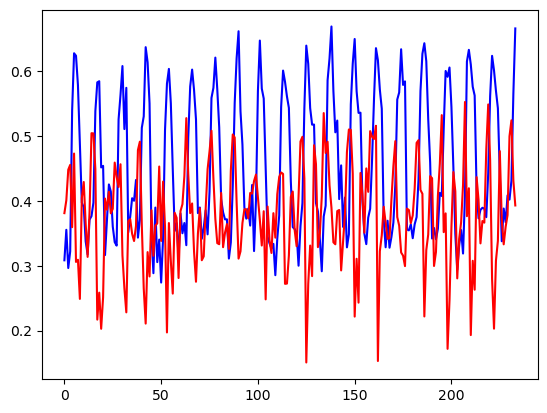

In [13]:
# Plotting the average monthly NDVI at presence and absence locations
crane_ndvi["key"] = crane_ndvi["OBSERVATION DATE"].apply(lambda d: f"{d.year}-{d.month:02d}")
crane_absence_ndvi["key"] = crane_absence_ndvi["date"].apply(lambda d: f"{d.year}-{d.month:02d}")

crane_grouped = crane_ndvi.groupby("key")
absence_grouped = crane_absence_ndvi.groupby("key")

presence_monthly_avg = []
absence_monthly_avg = []

for i, group in crane_grouped:
    presence_monthly_avg.append(group["NDVI"].mean())
    
for i, group in absence_grouped:
    absence_monthly_avg.append(group["Crane non presence ndvi"].mean())
    
dates = pd.date_range(start="2001-01", end="2020-07", freq="M")
x_values = np.arange(len(dates))  # X-axis positions
plt.plot(x_values, presence_monthly_avg, c = "blue")
plt.plot(x_values, absence_monthly_avg, c = "red")